### PROJECT-3. EDA + Feature Engineering.

In [1]:
import pandas as pd

In [2]:
hotels = pd.read_csv('_data/hotels.zip')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [3]:
values = {"lat": 0, "lng": 0}
hotels.fillna(value=values, inplace=True)

In [4]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
hotels.hotel_name.describe()

count                                         386803
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            3587
Name: hotel_name, dtype: object

In [6]:
import category_encoders as ce # импорт для работы с кодировщиком

bin_encoder = ce.BinaryEncoder(cols=['hotel_name']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])

hotels = pd.concat([hotels, type_bin], axis=1)

In [7]:
hotels['review_date'] = pd.to_datetime(hotels['review_date'])
date_max = hotels['review_date'].max()
hotels['days_ago'] = (date_max - hotels['review_date']).dt.days
hotels['review_weekday'] = hotels['review_date'].dt.dayofweek

#### Текстовые признаки
* hotel_address                               object 
* review_date                                 object
* hotel_name                                  object 
* reviewer_nationality                        object 
* negative_review                             object
* positive_review                             object 
* tags                                        object 
* days_since_review                           object 

#### Числовые признаки
* additional_number_of_scoring                int64  
* review_total_negative_word_counts           int64  
* total_number_of_reviews                     int64  
* review_total_positive_word_counts           int64  
* total_number_of_reviews_reviewer_has_given  int64  
* average_score                               float64

Нормализуем
* lat                                         float64
* lng                                         float64

Прогнозируемый признак
* reviewer_score                              float64

In [8]:
regex_1 = 'Stayed \d+ night' # регулярное выражение для подстроки
regex_2 = '\d+' # регулярное выражение для числа
hotels['nights'] = hotels['tags'].str.findall(regex_1).str.get(0).str.findall(regex_2).str.get(0)

In [9]:
values = {"nights": 0}
hotels.fillna(value=values, inplace=True)

In [10]:
#попытаемся выделить город в отдельный признак
#hotels['city'] = hotels['hotel_address'].str.split().str.get(-2)

### Стандартизация и нормализация

In [11]:
# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='lat', ylabel='Density'>

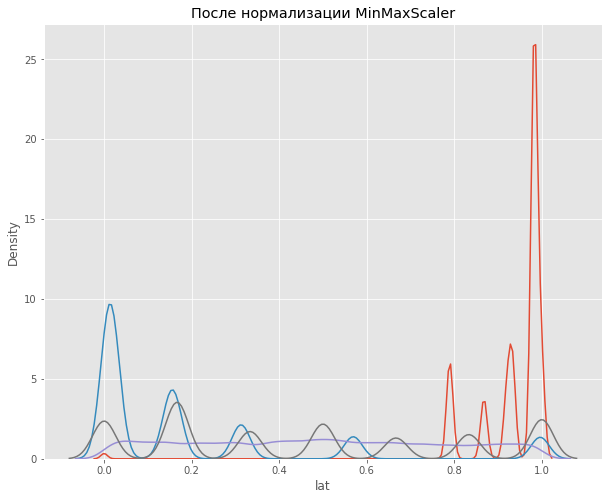

In [12]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(hotels[['lat', 'lng', 'days_ago', 'review_weekday']])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=['lat', 'lng', 'days_ago', 'review_weekday'])

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['lat'], ax=ax1)
sns.kdeplot(df_mm['lng'], ax=ax1)
sns.kdeplot(df_mm['days_ago'], ax=ax1)
sns.kdeplot(df_mm['review_weekday'], ax=ax1)

In [13]:
hotels.drop(['lat', 'lng', 'days_ago', 'review_weekday'], axis=1, inplace=True)

In [14]:
hotels = pd.merge(hotels, df_mm, left_index=True, right_index=True)

In [15]:
# непрерывные признаки
num_cols = ['average_score', 
            'additional_number_of_scoring',
            'total_number_of_reviews', 
            'review_total_negative_word_counts',
            'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given',
            'days_ago'
            ]  

# категориальные признаки
cat_cols = ['average_score',
            'lat', 
            'lng',
            'review_weekday', 
            'hotel_name_0',
            'hotel_name_1',
            'hotel_name_2',
            'hotel_name_3',
            'hotel_name_4',
            'hotel_name_5',
            'hotel_name_6',
            'hotel_name_7',
            'hotel_name_8',
            'hotel_name_9',
            'hotel_name_10',
            'nights']

In [16]:
# удаляем оставшиеся нечисловые признаки
hotels.drop(['hotel_address', 'review_date', 'hotel_name', 'reviewer_nationality', 'negative_review', 'positive_review', 'tags', 'days_since_review'], axis=1, inplace=True)

In [17]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: >

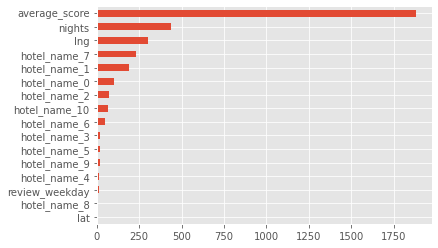

In [18]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

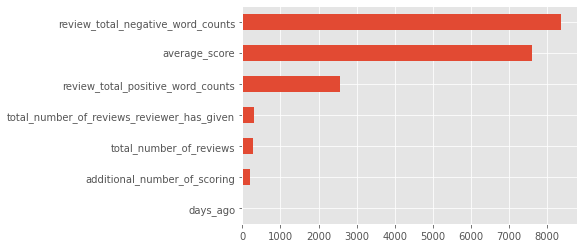

In [19]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [20]:
# удаляем наименее значимые признаки
#hotels.drop([
#        'review_weekday', 
#        'lat',
#        'additional_number_of_scoring', 
#        'days_ago'
#        ], axis=1, inplace=True)

In [21]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  

# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
    
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
    
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
    
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

In [23]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.13743368141684248


Исходный результат MAPE: 0.14134076256088657